In [1]:
# Import necessary libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define the dataset directories
base_path = r"C:\Users\mathe\Documents\deepfake_detection"
train_dir = os.path.join(base_path, "frames", "train")
val_dir = os.path.join(base_path, "frames", "val")
test_dir = os.path.join(base_path, "frames", "test")


In [3]:
# Function to count images in a directory
def count_images_in_directory(directory):
    real_path = os.path.join(directory, "real")
    fake_path = os.path.join(directory, "fake")
    num_real = len(os.listdir(real_path))
    num_fake = len(os.listdir(fake_path))
    return num_real, num_fake

# Count and display dataset distribution
train_real, train_fake = count_images_in_directory(train_dir)
val_real, val_fake = count_images_in_directory(val_dir)
test_real, test_fake = count_images_in_directory(test_dir)

print(f"Training set: {train_real} real, {train_fake} fake")
print(f"Validation set: {val_real} real, {val_fake} fake")
print(f"Testing set: {test_real} real, {test_fake} fake")

Training set: 4011 real, 3383 fake
Validation set: 1146 real, 967 fake
Testing set: 574 real, 484 fake


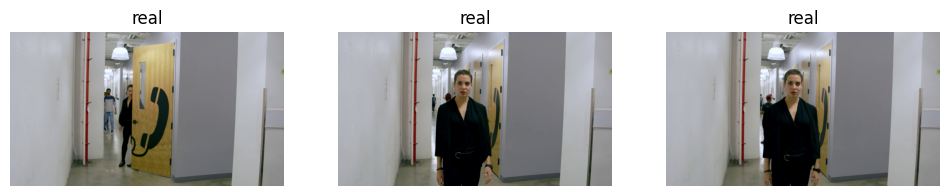

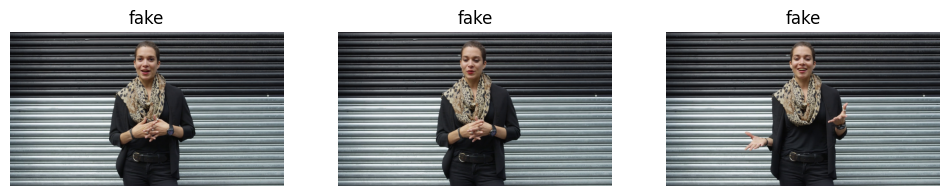

In [4]:
# Function to display sample images
def display_sample_images(directory, category, num_images=3):
    path = os.path.join(directory, category)
    images = os.listdir(path)[:num_images]
    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(category)
    plt.show()

# Display real and fake images
display_sample_images(train_dir, "real")
display_sample_images(train_dir, "fake")


In [5]:
# Analyze image sizes and aspect ratios
def analyze_image_properties(directory):
    sizes = []
    for category in ["real", "fake"]:
        path = os.path.join(directory, category)
        images = os.listdir(path)
        for img_name in images:
            img_path = os.path.join(path, img_name)
            with Image.open(img_path) as img:
                sizes.append(img.size)
    sizes = np.array(sizes)
    print(f"Average width: {np.mean(sizes[:, 0])}, Average height: {np.mean(sizes[:, 1])}")
    print(f"Most common aspect ratio: {np.median(sizes[:, 0] / sizes[:, 1])}")

# Analyze training image properties
analyze_image_properties(train_dir)


Average width: 1920.0, Average height: 1080.0
Most common aspect ratio: 1.7777777777777777
